<a href="https://colab.research.google.com/github/Deniswanja/Denis-kim/blob/master/IRIS_PREDICTION_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas 
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [8]:
from sklearn import datasets
iris = datasets.load_iris()

In [9]:
import pandas as pd

In [10]:
iris_data= iris.data
iris_data=pd.DataFrame(iris_data,columns=iris.feature_names)
iris_data['class']=iris.target

In [11]:
iris_data


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
print(iris_data.describe())

       sepal length (cm)  sepal width (cm)  ...  petal width (cm)       class
count         150.000000        150.000000  ...        150.000000  150.000000
mean            5.843333          3.057333  ...          1.199333    1.000000
std             0.828066          0.435866  ...          0.762238    0.819232
min             4.300000          2.000000  ...          0.100000    0.000000
25%             5.100000          2.800000  ...          0.300000    0.000000
50%             5.800000          3.000000  ...          1.300000    1.000000
75%             6.400000          3.300000  ...          1.800000    2.000000
max             7.900000          4.400000  ...          2.500000    2.000000

[8 rows x 5 columns]


In [ ]:
print(iris_data.groupby('class').size())

class
0    50
1    50
2    50
dtype: int64


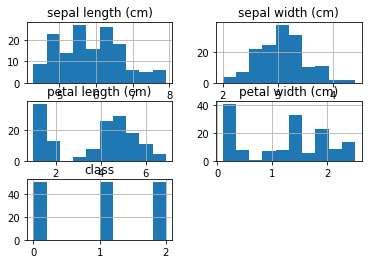

In [13]:
iris_data.hist()
plt.show()

In [14]:
array = iris_data.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [15]:
seed = 7
scoring = 'accuracy'

In [16]:
from sklearn.ensemble import RandomForestClassifier #ensembles

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF',RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.966667 (0.040825)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)
RF: 0.966667 (0.040825)


In [17]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       0.85      0.92      0.88        12
         2.0       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



In [ ]:
RF=RandomForestClassifier(n_estimators=5)
RF.fit(X_train,Y_train)
prediction=RF.predict(X_validation)
print(accuracy_score(Y_validation,prediction))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       0.85      0.92      0.88        12
         2.0       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



In [ ]:
CART= DecisionTreeClassifier()
CART.fit(X_train, Y_train)
predictions = CART.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8666666666666667
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       0.83      0.83      0.83        12
         2.0       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30



In [ ]:
SVM= SVC()
SVM.fit(X_train,Y_train)
prediction=SVM.predict(X_validation)
print(accuracy_score(Y_validation,prediction))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

0.8666666666666667
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       0.83      0.83      0.83        12
         2.0       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30



0.8333333333333334
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       0.85      0.92      0.88        12
         2.0       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



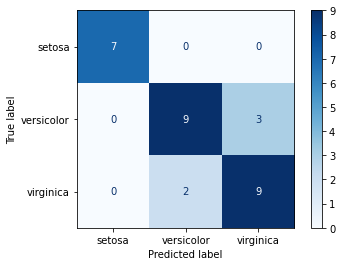

In [ ]:
NB = GaussianNB()
NB.fit(X_train,Y_train)
prediction=NB.predict(X_validation)
print(accuracy_score(Y_validation,prediction))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))
from sklearn import metrics
metrics.plot_confusion_matrix(NB, X_validation, Y_validation, cmap=plt.cm.Blues, display_labels=iris.target_names)
plt.show()

0.8666666666666667
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       0.85      0.92      0.88        12
         2.0       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



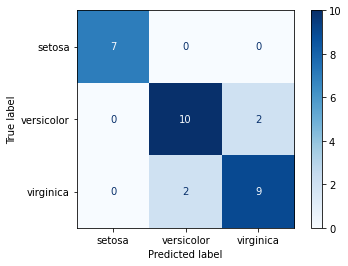

In [ ]:
LD=RandomForestClassifier(n_estimators=5)
LD.fit(X_train,Y_train)
prediction=LD.predict(X_validation)
print(accuracy_score(Y_validation,prediction))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))
from sklearn import metrics
metrics.plot_confusion_matrix(LD, X_validation, Y_validation, cmap=plt.cm.Blues, display_labels=iris.target_names)
plt.show()

0.8666666666666667
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       0.85      0.92      0.88        12
         2.0       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



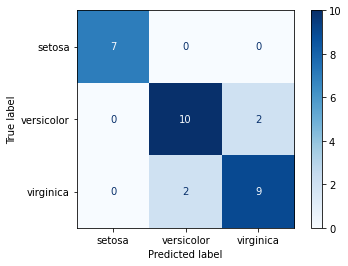

In [18]:
LR=RandomForestClassifier(n_estimators=5)
LR.fit(X_train,Y_train)
prediction=LR.predict(X_validation)
print(accuracy_score(Y_validation,prediction))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))
from sklearn import metrics
metrics.plot_confusion_matrix(LR, X_validation, Y_validation, cmap=plt.cm.Blues, display_labels=iris.target_names)
plt.show()

In [ ]:
from mlxtend.plotting import plot_decision_regions

0.8666666666666667
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       0.85      0.92      0.88        12
         2.0       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



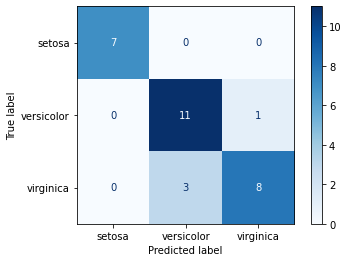

In [ ]:
LDA=RandomForestClassifier(n_estimators=5)
LDA.fit(X_train,Y_train)
prediction=LDA.predict(X_validation)
print(accuracy_score(Y_validation,prediction))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))
from sklearn import metrics
metrics.plot_confusion_matrix(LDA, X_validation, Y_validation, cmap=plt.cm.Blues, display_labels=iris.target_names)
plt.show()